<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chopping-costs" data-toc-modified-id="Chopping-costs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chopping costs</a></span><ul class="toc-item"><li><span><a href="#Read-the-data" data-toc-modified-id="Read-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read the data</a></span></li><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot the data</a></span></li></ul></li><li><span><a href="#Contraction-cost" data-toc-modified-id="Contraction-cost-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Contraction cost</a></span><ul class="toc-item"><li><span><a href="#Theoretical-plot-of-elimination" data-toc-modified-id="Theoretical-plot-of-elimination-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Theoretical plot of elimination</a></span></li></ul></li><li><span><a href="#Experimental-plot" data-toc-modified-id="Experimental-plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Experimental plot</a></span></li></ul></div>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('whitegrid')

## Chopping costs

### Read the data

data should be output of `python get_contraction_width.py $size $seed $parvars`

In [9]:
filenames = [
    './contrw/58_42_6'
    #,'./contrw/58_43_6'
    ,'./contrw/58_42_7'
    , './contrw/58_42_8'
]
dfs = [pd.read_csv(f, sep='\t', header=14) for f in filenames]
dfs[0]

,Idx,residue,max_nghs,current_ngh,pvars
0,1758,132.0,35.0,5.0,"[v_565, v_459, v_675, v_551, v_839, v_731]"
1,1759,131.0,36.0,5.0,"[v_565, v_459, v_675, v_551, v_839, v_731]"
2,1760,130.0,36.0,5.0,"[v_565, v_459, v_675, v_551, v_839, v_731]"
3,1761,129.0,33.0,5.0,"[v_641, v_565, v_459, v_675, v_551, v_839]"
4,1762,128.0,33.0,5.0,"[v_641, v_565, v_459, v_675, v_551, v_839]"
...,...,...,...,...,...
85,1843,47.0,38.0,33.0,"[v_805, v_669, v_697, v_459, v_641, v_779]"
86,1844,46.0,38.0,38.0,"[v_551, v_805, v_669, v_697, v_615, v_749]"
87,1845,45.0,38.0,37.0,"[v_551, v_805, v_669, v_697, v_615, v_749]"
88,1846,44.0,37.0,44.0,"[v_565, v_551, v_731, v_693, v_805, v_795]"


### Plot the data 

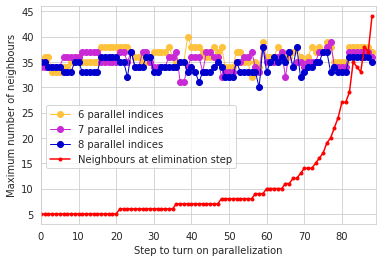

In [33]:

colors = (plt.cm.gnuplot2(x) for x in np.linspace(.8,.2,len(dfs)))
labels = (f'{x} parallel indices' for x in range(6,9))

f = plt.figure(figsize=(6,4))
#plt.title('Max N with respect to chop point')

for d in dfs:
    d.max_nghs.plot(marker='o'
                    ,linewidth=1
                    ,label=next(labels)
                    ,color=next(colors)
                   )
dfs[0].current_ngh.plot(style='.-', color='red', label='Neighbours at elimination step')

plt.ylabel('Maximum number of neighbours')
plt.xlabel('Step to turn on parallelization')
plt.legend(loc='center left', bbox_to_anchor=(.0,.4))
plt.savefig('figures/max_nngh_vs_chop_index_58_42d3.pdf')


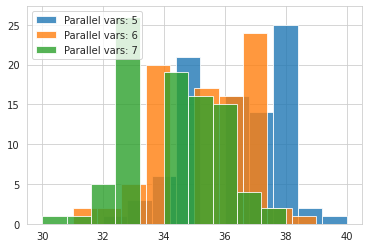

In [11]:
    
labels = (f'Parallel vars: {x}' for x in range(5,9))
for d in dfs:
    d.max_nghs.hist(alpha=.8,label=next(labels))

plt.legend()


## Contraction cost

In [12]:
import sys
sys.path.append('..')
sys.path.append('../qaoa')

import utils
import utils_qaoa as qu
import json
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
S = 49
mems, flops, nghs, N = qu.get_cost_of_task(S, seed=42, type='randomreg', degree=3)
N

100%|██████████| 1350/1350 [00:53<00:00, 25.07it/s] 


150

In [14]:
exp_data = json.load((open('./result_data/contracts_49_42d3.json')))
exp_data.keys()

dict_keys(['proc_buck memory', 'proc_buck time', 'contr process memory:', 'parallel contract'])

In [15]:
mems_exp = exp_data['proc_buck memory']
times_exp = exp_data['proc_buck time']

### Theoretical plot of elimination

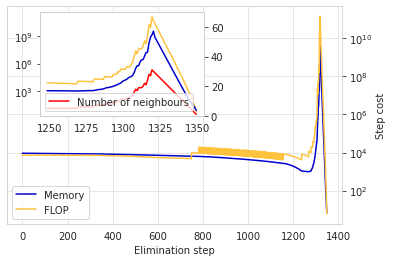

In [38]:
fig = plt.figure(figsize=(6,4))
colors = [plt.cm.gnuplot2(x) for x in np.linspace(.8,.2,2)]

ax = plt.gca()
utils.plot_cost(mems, flops)
plt.xlabel('Elimination step')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
[l.set_color(c) for l, c in zip(ax.get_lines(),reversed(colors))]
plt.legend(loc='lower left')
plt.ylabel('Step cost')

inset = fig.add_axes([.2, .5, .38, .36])
#plt.xlabel('Elimination step')
L = len(nghs)
c = 102
plt.yscale('log')
inset.plot(range(L-c, L), flops[-c:], color=colors[0])
inset.plot(range(L-c, L), mems[-c:], color=colors[1])
plt.grid(None)
ax2 = plt.gca().twinx()
ax2.plot(range(L-c, L), nghs[-c:], color='red', label='Number of neighbours')
#plt.yscale('log')
plt.grid(None)
plt.legend(loc='lower left')
plt.ylim(0,70)
plt.savefig('figures/contraction_cost_58_42d3.pdf')

## Experimental plot

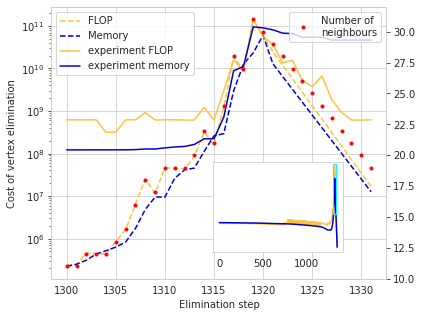

In [39]:
slice_ = slice(-50, -18)
xsm = list(range(len(mems)))[slice_]
fig = plt.figure(figsize=(6,5))
plt.plot(xsm, flops[slice_], '--', label='FLOP', color=colors[0])
plt.plot(xsm, 16*np.array(mems)[slice_], '--', label='Memory', color=colors[1])

plt.plot(xsm, 3e9*np.array(times_exp)[slice_], label='experiment FLOP', color=colors[0])
plt.plot(xsm, mems_exp[slice_], label='experiment memory', color=colors[1])

plt.yscale('log')
plt.xlabel('Elimination step')
plt.ylabel('Cost of vertex elimination')
plt.legend()
ax = plt.gca()
sep = ax.twinx()
#plt.ylim(18, 50)
plt.plot(xsm, nghs[slice_], '. ', label='Number of\nneighbours', color='red')
plt.legend(loc='upper right')
plt.grid(None)

inset = fig.add_axes([.5, .2, .3, .25])
inset.plot(flops, color=colors[0])
inset.plot(mems, color=colors[1])
inset.yaxis.set_visible(False)
plt.grid(None)
plt.yscale('log')
_ = inset.indicate_inset_zoom(ax, edgecolor='cyan', alpha=1)


plt.savefig('figures/theory_vs_exp_contract_49_42d3.pdf')

In [18]:
max(mems_exp)/1e9

94.997839872